<div style="text-align:center; font-family:Georgia;">
    <h1>Twitter US Airlines</h1>
</div>

In [3]:
#Load, view and clean data
# Set Pandas to display maximum number of columns
# Set Pandas to display maximum number of rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Load data
# Create a duplicate

# Specify the directory path
directory = "C:\\Users\\and_c\\Class10\\" #CHANGE PATH


# Generate the complete file path by joining the directory and a filename
file_path = os.path.join(directory, "TweetsAirlines.csv")

# Save DataFrame to CSV with the specified file path
df = pd.read_csv(file_path)
data = df

In [5]:
# Display the first 5 rows of the dataframe

df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [6]:
# Display the count of unique rows and columns in the dataset

print(df.shape)

# Display the central tendencies of the dataset

df.describe()

(14640, 15)


tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

In [7]:
# Display column names

list(data.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [8]:
# Create a Pandas DataFrame called missing that contains the percentage of missing values in each column of the DataFrame df
# Sort the missing DataFrame by the percentage of missing values, in descending order
# Print the number of columns in the missing DataFrame that have missing values

missing = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 5))
missing = missing.sort_values(0,ascending=False)
print( 'Number of columns with nulls', len(missing[missing[0]>0]))

Number of columns with nulls 7


In [9]:
#cleaning missing values
#Display the missing Dataframe

missing 

0
negativereason_gold           99.78142
airline_sentiment_gold        99.72678
tweet_coord                   93.03962
negativereason                37.30874
user_timezone                 32.92350
tweet_location                32.32923
negativereason_confidence     28.12842
tweet_id                       0.00000
airline_sentiment              0.00000
airline_sentiment_confidence   0.00000
airline                        0.00000
name                           0.00000
retweet_count                  0.00000
text                           0.00000
tweet_created                  0.00000

In [10]:
# Display the missing Dataframe (as percentage of total values in column)

print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

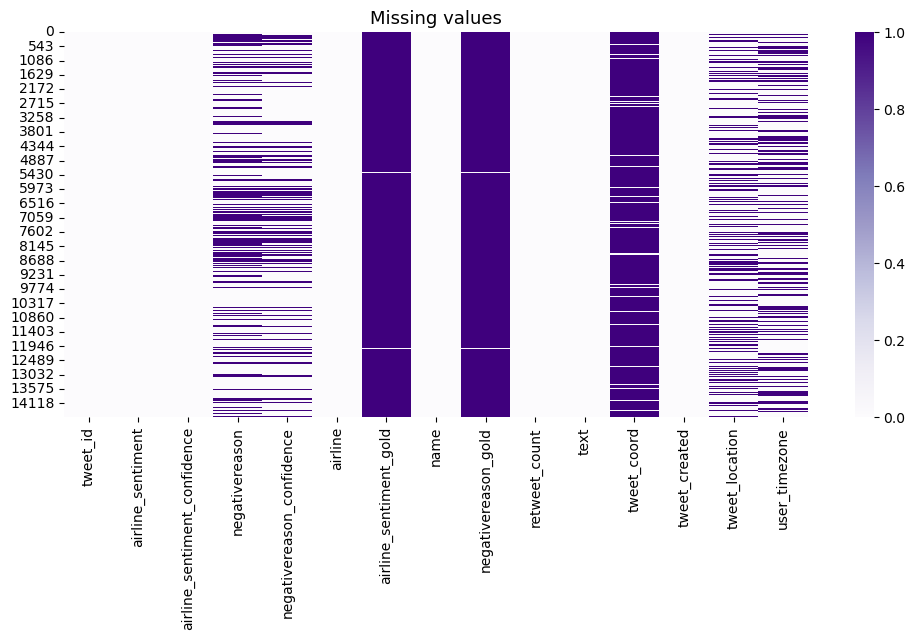

In [11]:
#Display of missing values using heatmap

plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cmap = "Purples")                       
plt.title("Missing values", fontsize = 13)
plt.show()

In [12]:
# Drop the 3 mentioned columns
df = df.drop('tweet_coord', axis=1)
df = df.drop('airline_sentiment_gold', axis=1)
df = df.drop('negativereason_gold', axis=1)

df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [13]:
#Display unique values in Airline column

data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [14]:
#For easier data manipulation, the vetor Airline is created

airlines= ['United','US Airways','American','Southwest','Delta','Virgin America']
airlines

['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']

In [15]:
# Splitting the "Time_submitted" column
new1 = df["tweet_created"].str.split(" ", n = 1, expand = True) 

# Creating a new column "date" to the dataset
df["date"]= new1[0] 
  
# Creating a new column "day" to the dataset 
df["time"]= new1[1] 

# Displaying the first 5 rows of the updated dataset
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date            time  
0  2015-02-24  11:35:52 -0800  
1  2015-02-24  11:15:59 -0800  
2  2015-02-24  11:15:48 -0800  
3  2015-02-24  11:15:36 -0800  
4  2015-02-24  11:14:45 -0800

In [16]:
# Split the "date" column
new1 = df['date'].str.split("-", expand = True) 

# Add "year" to the main dataset 
df["year"]= new1[0] 
  
# Add "month" to the main dataset 
df["month"]= new1[1] 

# Add "day" to the main dataset 
df["day"]= new1[2] 
#
# Display the first 5 rows of the updated dataset
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date            time  year month day  
0  2015-02-24  11:35:52 -0800  2015    02  24  
1  2015-02-24  11:15:59 -0800  2015    02  24  
2  2015-02-24  11:15:48 -0800  2015    02  24  
3  2015-02-24  11:15:36 -0800  2015    02  24  
4  2015-02-24  11:14:45 -0800  2015    02  24

In [17]:

# Sample DataFrame with a "time" column
dict_time = pd.DataFrame({"time": ["09:30:00", "12:45:00", "18:15:00", "22:30:00"]})

# Convert "time" column to datetime
df["time"] = pd.to_datetime(df["time"])

# Define time categories
morning_start = pd.to_datetime("06:00:00").time()
morning_end = pd.to_datetime("11:59:59").time()
afternoon_start = pd.to_datetime("12:00:00").time()
afternoon_end = pd.to_datetime("17:59:59").time()
evening_start = pd.to_datetime("18:00:00").time()
evening_end = pd.to_datetime("23:59:59").time()
night_start = pd.to_datetime("00:00:00").time()
night_end = pd.to_datetime("05:59:59").time()

# Define a function to categorize the time
def categorize_time(time):
    if morning_start <= time <= morning_end:
        return "Morning"
    elif afternoon_start <= time <= afternoon_end:
        return "Afternoon"
    elif evening_start <= time <= evening_end:
        return "Evening"
    elif night_start <= time <= night_end:
        return "Night"
    else:
        return "Undefined"

# Apply the categorize_time function to the "time" column
df["time_category"] = df["time"].dt.time.apply(categorize_time)

# Print the DataFrame with time categories
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date                      time  year month day time_category  
0  2015-02-24 2023-07-20 11:35:52-08:00  2015    02  24       Morning  
1  2015-02-24 2023-07-20 11:15:59-08:00  2015    02  24       Morning  
2  2015-02-24 2023-07-20 11:15:48-08:00  2015    02  24       Morning  
3  2015-02-24 2023-07-20 11:15:36-08:00  2015    02  24       Morning  
4  2015-02-24 2023-07-20 11:14:45-08:00  2015    02  24       Morning

In [18]:
#Number of tweets per Airline

print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


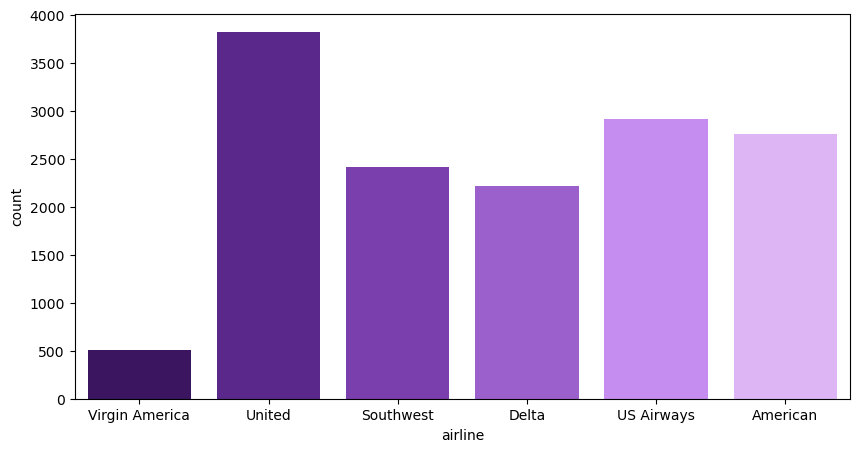

In [19]:
#Total tweets per airline

#Customizing the graph colors
color_palette = ["#3C096C", "#5A189A", "#7B2CBF", "#9D4EDD", "#C77DFF", "#E0AAFF"]  

plt.figure(figsize = (10, 5))
ax = sns.countplot(x = "airline", data = df, palette=color_palette)
plt.show()


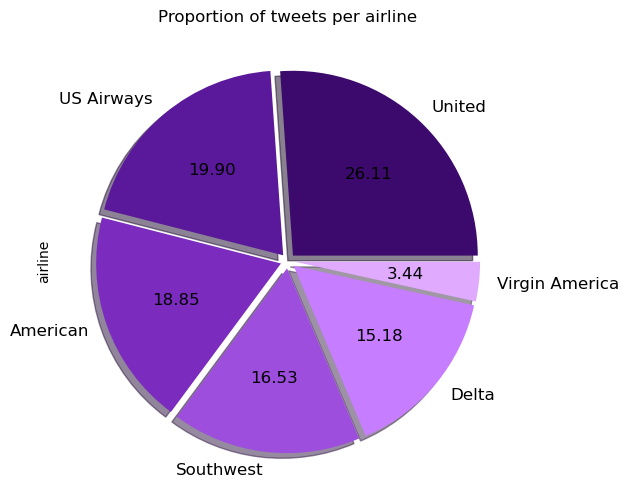

In [20]:
#Plotting the proportion of tweets per airline

ax.set_title(label = 'Proportion of tweets per airline')
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind='pie',colors=color_palette,labels=airlines,explode=[0.04,0.04,0.04,0.04, 0.04,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Proportion of tweets per airline")

plt.show()

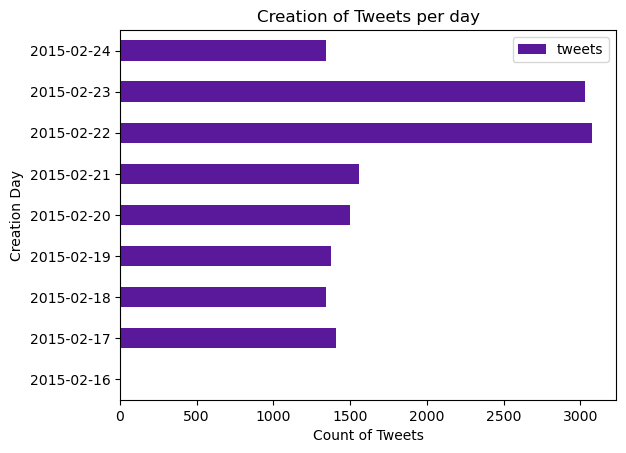

In [21]:
#Total tweets per day (graph)

# Group by 'tweet_created' and calculate the count of tweets
grouped = df.groupby('date').size().reset_index(name='tweets')

# Plot horizontal bar graph
grouped.plot(kind='barh', x='date', stacked=False, color="#5A189A")

plt.xlabel('Count of Tweets')
plt.ylabel('Creation Day')
plt.title('Creation of Tweets per day')


plt.show()


In [22]:
#Display tweets per day per sentiment (table)

grouped = df.groupby('date').size().reset_index(name='tweets')
display(grouped)

date  tweets
0  2015-02-16       4
1  2015-02-17    1408
2  2015-02-18    1344
3  2015-02-19    1376
4  2015-02-20    1500
5  2015-02-21    1557
6  2015-02-22    3079
7  2015-02-23    3028
8  2015-02-24    1344

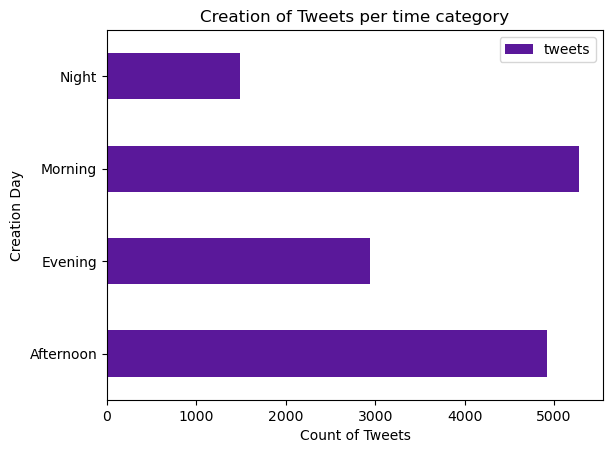

In [23]:
#Total tweets per day (graph)


grouped = df.groupby('time_category').size().reset_index(name='tweets')
grouped.plot(kind='barh', x='time_category', stacked=False, color="#5A189A")

plt.xlabel('Count of Tweets')
plt.ylabel('Creation Day')
plt.title('Creation of Tweets per time category')
plt.show()

In [24]:
#Display tweets per day per sentiment (table)

grouped = df.groupby('time_category').size().reset_index(name='tweets')
display(grouped)

time_category  tweets
0     Afternoon    4927
1       Evening    2943
2       Morning    5284
3         Night    1486

Text(0.5, 1.0, 'Tweets per Sentiment')

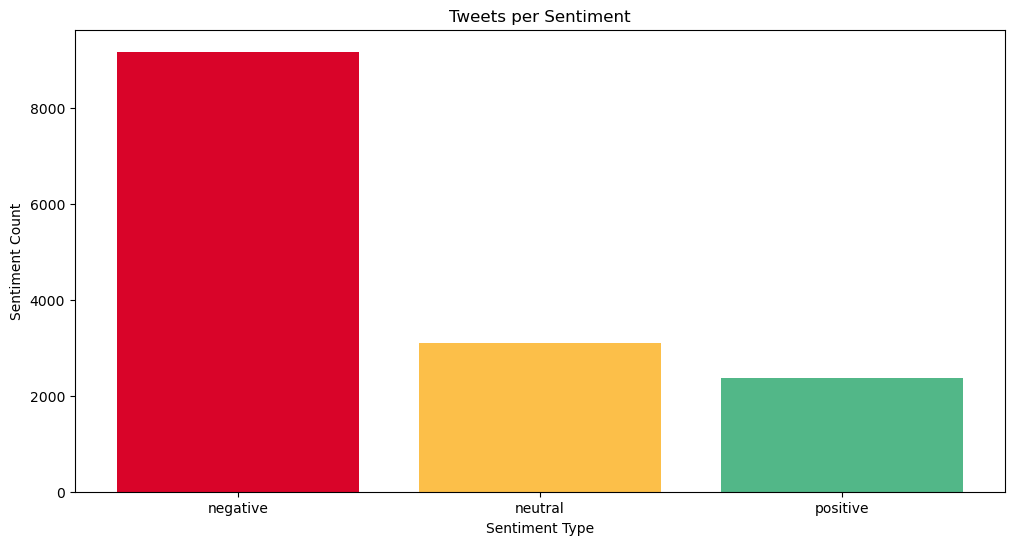

In [25]:
#Tweets per Sentiment General

counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['#D90429','#FCBF49','#52B788'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Tweets per Sentiment')

In [26]:
#Display tweets per day per sentiment (table)

grouped = df.groupby('airline_sentiment').size().reset_index(name='tweets')
display(grouped)

airline_sentiment  tweets
0          negative    9178
1           neutral    3099
2          positive    2363

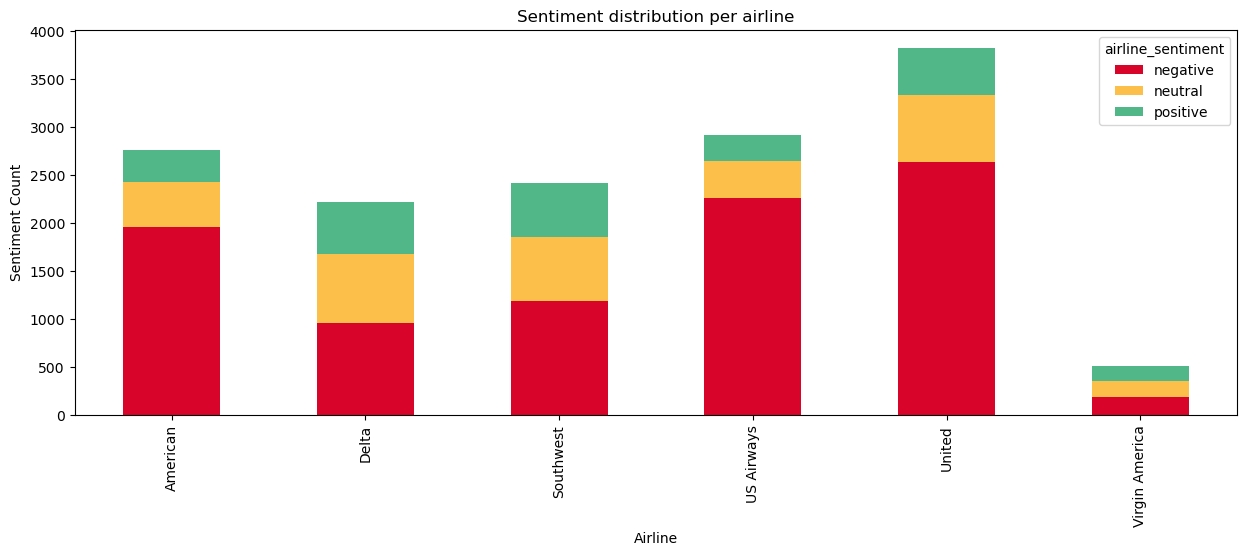

In [27]:
#Total Sentiment tweets per Airline

colorsent=['#D90429','#FCBF49','#52B788']

figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15, 5), color=colorsent)

plt.xlabel('Airline')
plt.ylabel('Sentiment Count')
plt.title('Sentiment distribution per airline')

plt.show()

In [28]:
#Print Values of sentiments per Airline

print(figure_2)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


            Percent Negative
American            0.710402
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


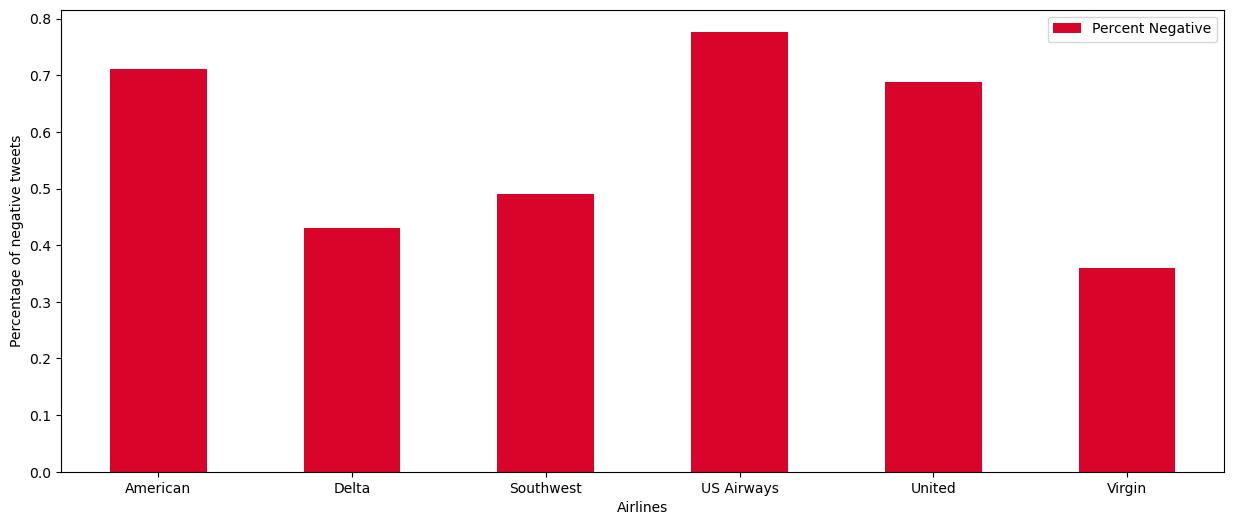

In [29]:
#Percentage of negative tweets per airline

neg_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)

color_red = ['#D90429', '#D90429', '#D90429', '#D90429', '#D90429', '#D90429'] 

ax = perc.plot(kind = 'bar', rot=0, color=color_red, figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')

plt.show()

In [30]:
# Grouping the dataset by the negative reason of the flight

freq = df.groupby("negativereason").size()
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

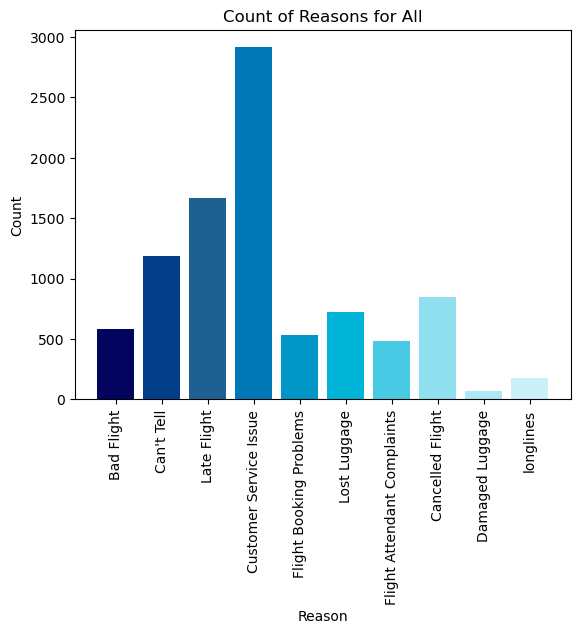

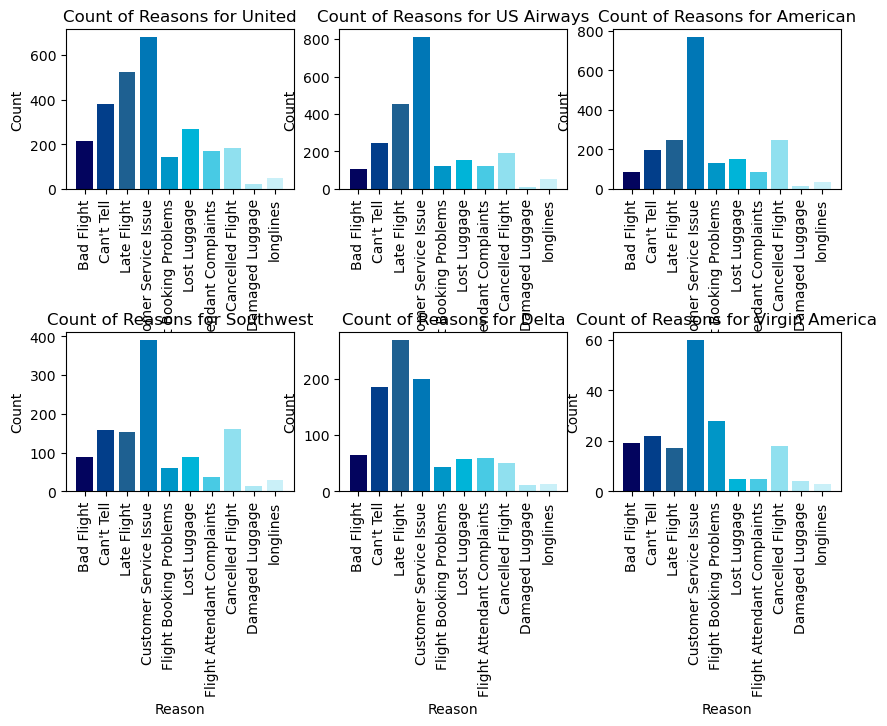

In [31]:
#Get the number of negative reasons (General & per airline)

data['negativereason'].nunique()

NR_Count=dict(data['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['#03045E','#023E8A','#1E6091','#0077B6','#0096C7','#00B4D8','#48CAE4','#90E0EF','#ADE8F4','#CAF0F8'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(10, 6))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.90)
    plot_reason(i)

In [32]:
#Tweets per sentiment per day

day_df = df.groupby(['date','airline','airline_sentiment']).size()

# day_df = day_df.reset_index()
day_df

date        airline         airline_sentiment
2015-02-16  Delta           negative               1
                            neutral                1
            United          negative               2
2015-02-17  Delta           negative             108
                            neutral               86
                            positive              69
            Southwest       negative             213
                            neutral               85
                            positive              86
            US Airways      negative             233
                            neutral               30
                            positive              48
            United          negative             272
                            neutral               75
                            positive              49
            Virgin America  negative              12
                            neutral               21
                            positive              21


In [33]:
#Display tweets per day per sentiment (table)

grouped = df.groupby(['date', 'airline_sentiment']).size().reset_index(name='twets2')
pivot_table = grouped.pivot(index='date', columns='airline_sentiment', values='twets2')
pivot_table['Total'] = pivot_table.sum(axis=1)

print(pivot_table)

airline_sentiment  negative  neutral  positive   Total
date                                                  
2015-02-16              3.0      1.0       NaN     4.0
2015-02-17            838.0    297.0     273.0  1408.0
2015-02-18            736.0    335.0     273.0  1344.0
2015-02-19            751.0    329.0     296.0  1376.0
2015-02-20            835.0    383.0     282.0  1500.0
2015-02-21           1049.0    278.0     230.0  1557.0
2015-02-22           2266.0    463.0     350.0  3079.0
2015-02-23           1919.0    676.0     433.0  3028.0
2015-02-24            781.0    337.0     226.0  1344.0


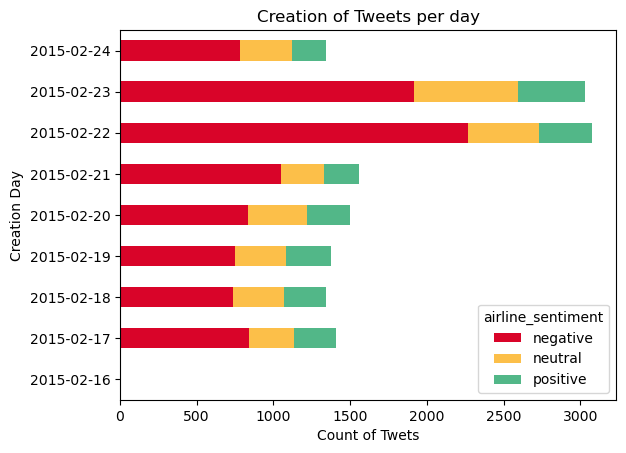

In [34]:
#Display tweets per day per sentiment (graph)

grouped = df.groupby(['date', 'airline_sentiment']).size().reset_index(name='twets2')
pivot_table = grouped.pivot(index='date', columns='airline_sentiment', values='twets2')
pivot_table.plot(kind='barh', stacked=True, color =colorsent)

plt.xlabel('Count of Twets')
plt.ylabel('Creation Day')
plt.title('Creation of Tweets per day')

plt.show()

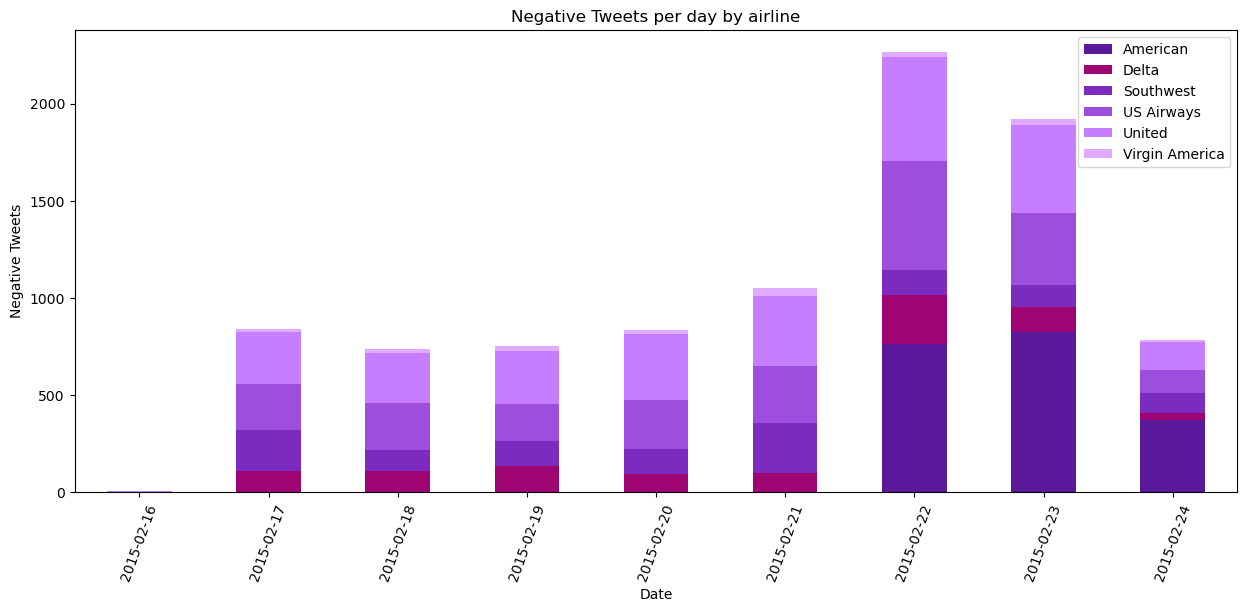

In [35]:
#negative tweets per day by airline

day_df = day_df.loc(axis=0)[:,:,'negative']

ax2 = day_df.groupby(['date','airline']).sum().unstack().plot(kind='bar', stacked=True,
                                                                      color = [  "#5A189A", "#9E0573","#7B2CBF", "#9D4EDD", "#C77DFF", "#E0AAFF"],
                                                                      figsize=(15, 6), rot=70)
labels = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
ax2.legend(labels=labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.title("Negative Tweets per day by airline")
plt.show()


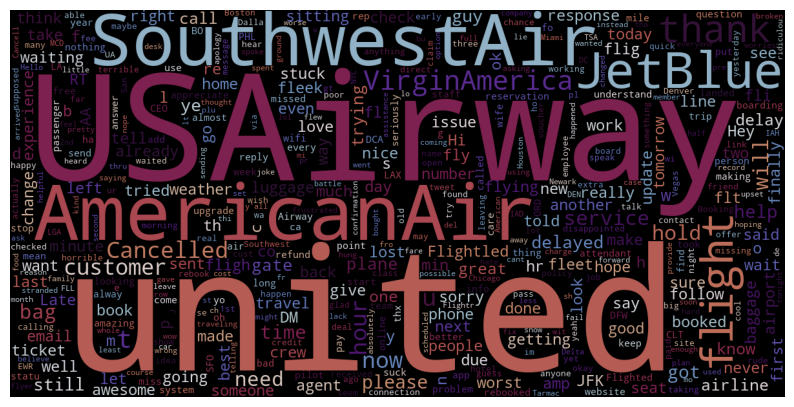

In [36]:
text2 = data['text']
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,background_color='#000000', colormap='twilight_shifted').generate(str(text2))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [37]:
data=df

In [38]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date                      time  year month day time_category  
0  2015-02-24 2023-07-20 11:35:52-08:00  2015    02  24       Morning  
1  2015-02-24 2023-07-20 11:15:59-08:00  2015    02  24       Morning  
2  2015-02-24 2023-07-20 11:15:48-08:00  2015    02  24       Morning  
3  2015-02-24 2023-07-20 11:15:36-08:00  2015    02  24       Morning  
4  2015-02-24 2023-07-20 11:14:45-08:00  2015    02  24       Morning

In [39]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [40]:
# Specify the directory path
directory = "C:\\Users\\and_c\\Class10\\" #CHANGE PATH

# Generate the complete file path by joining the directory and a filename
file_path = os.path.join(directory, "clean.csv")

# Check if the file exists
if os.path.isfile(file_path): 
    
    # Open the stored Dataframe "clean"
    df = pd.read_csv(file_path, encoding = 'latin-1')  
    
    print("File already exists. Skipping the code.")
else:
    
    # Start the timer
    start_time = time.time()
    
    # Create the "clean" DataFrame
    df['clean'] = df['text'].map(lambda x: preprocess(x))

    # Save DataFrame to CSV
    df.to_csv(file_path, index=False) 
    
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    
    print(f"Code executed and CSV file created. Elapsed time: {elapsed_time:.2f} seconds.")

File already exists. Skipping the code.


In [41]:
# Generate the complete file path by joining the directory and a filename
file_path = os.path.join(directory, "clean.csv")

# Check if the file exists
if os.path.isfile(file_path):
    # Open the stored DataFrame "clean"
    df = pd.read_csv(file_path, encoding='latin-1')
    print("File already exists. Skipping the code.")
else:
    # Start the timer
    start_time = time.time()

    # Create the "clean" DataFrame
    df['clean'] = df['text'].map(lambda x: preprocess(x))

    # Calculate the elapsed time
    elapsed_time = time.time() - start_time

    print(f"Code executed and CSV file created. Elapsed time: {elapsed_time:.2f} seconds.")

File already exists. Skipping the code.


In [42]:
df['clean'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: clean, dtype: object

In [43]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date                       time  year  month  day time_category  \
0  2015-02-24  2023-07-19 11:35:52-08:00  2015      2   24       Morning   
1  2015-02-24  2023-07-19 11:15:59-08:00  2015      2   24       Morning   
2  2015-02-24  2023-07-19 11:15:48-08:00  2015      2   24       Morning   
3  2015-02-24  2023-07-19 11:15:36-08:00  2015      2   24       Morning   
4  2015-02-24  2023-07-19 11:14:45-08:00  2015      2   24       Morning   

                                               clean  
0                        virginamerica dhepburn said  
1  virginamerica plus added commercials experienc...  
2  virginamerica today must mean need take anothe...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing

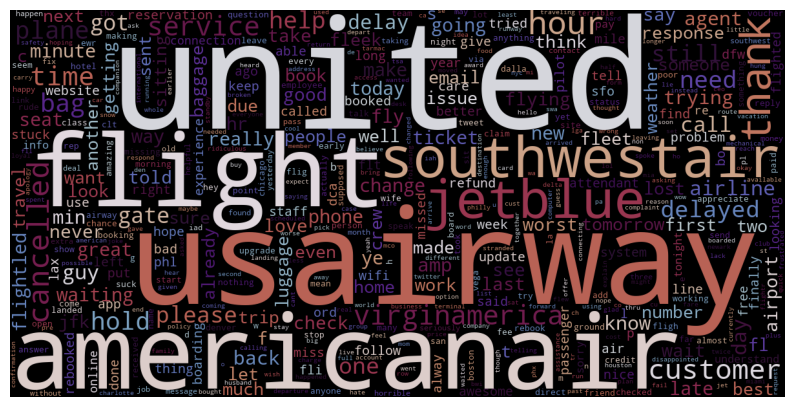

In [44]:
text = df['clean']
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,background_color='#000000', colormap='twilight_shifted').generate(str(text))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [45]:
# Filter out NaN and convert float values to strings in the 'clean' column
df.dropna(subset=['clean'], inplace=True)

#Top 10 most common words
topwords = Counter(" ".join(df["clean"]).split()).most_common(10)
topwords

[('united', 4165),
 ('flight', 3958),
 ('usairways', 3053),
 ('americanair', 2964),
 ('southwestair', 2461),
 ('jetblue', 2395),
 ('get', 1342),
 ('thanks', 1083),
 ('cancelled', 1065),
 ('service', 967)]

In [46]:
#Removing most common words

df["textclean"] = df['clean'].str.replace('united', '').str.replace('flight', '').str.replace('usairways', '').str.replace('americanair', '').str.replace('southwestair', '').str.replace('jetblue', '').str.replace('virginamerica','').str.replace('airports', '')

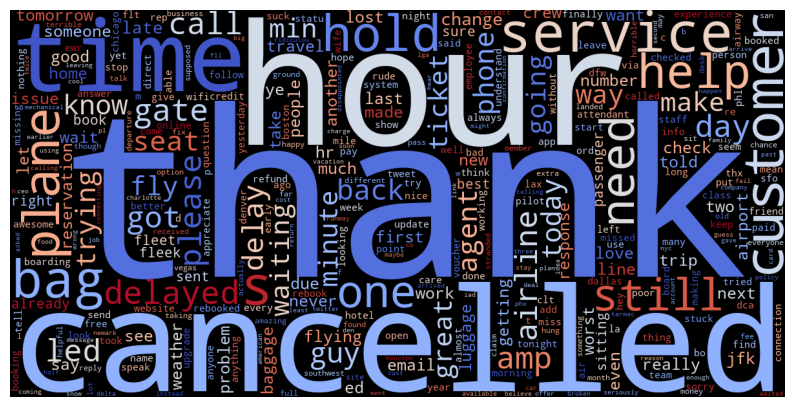

In [47]:
#Wordcloud after the words are removed

text = df['textclean']
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,background_color='#000000', colormap='coolwarm').generate(str(text))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [48]:
#Top 10 most common words

topwords2 = Counter(" ".join(df["textclean"]).split()).most_common(10)
topwords2

[('get', 1342),
 ('thanks', 1085),
 ('cancelled', 1066),
 ('service', 967),
 ('help', 873),
 ('time', 793),
 ('customer', 758),
 ('amp', 683),
 ('hours', 682),
 ('s', 650)]

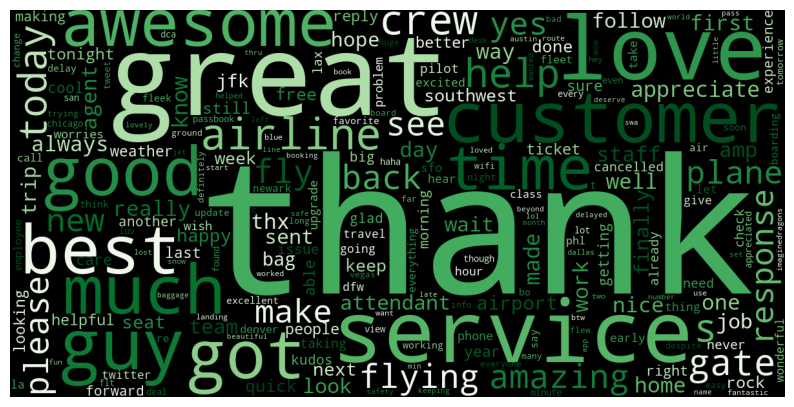

In [49]:
#Wordcloud for Positive Sentiment

# Filter the DataFrame for positive sentiment
positive_df = df[df['airline_sentiment'] == 'positive']

# Extract the text data from the 'textclean' column
text = positive_df['textclean']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,background_color='#000000', colormap='Greens').generate(str(text))
plt.imshow(wc)
plt.axis('off')
plt.show()

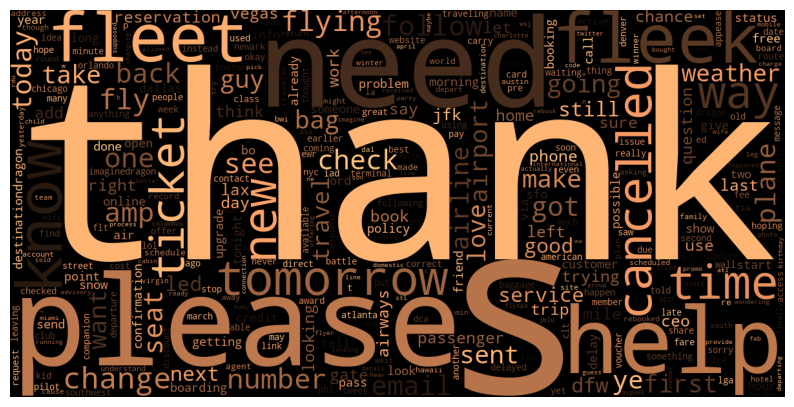

In [50]:
#Wordcloud for Neutral Sentiment

# Filter the DataFrame for positive sentiment
positive_df = df[df['airline_sentiment'] == 'neutral']

# Extract the text data from the 'textclean' column
text = positive_df['textclean']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,background_color='#000000', colormap='copper').generate(str(text))
plt.imshow(wc)
plt.axis('off')
plt.show()

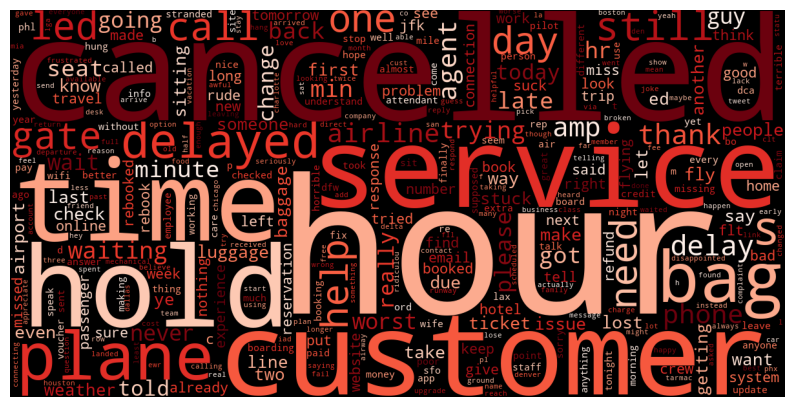

In [51]:
#Wordcloud for Negative sentiment

# Filter the DataFrame for positive sentiment
positive_df = df[df['airline_sentiment'] == 'negative']

# Extract the text data from the 'textclean' column
text = positive_df['textclean']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,background_color='#000000', colormap='Reds').generate(str(text))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [52]:
df['tweet_len'] = df['textclean'].astype(str).apply(len)
df['polarity'] = df['textclean'].map(lambda text: TextBlob(text).sentiment.polarity)
df['word_count'] = df['textclean'].apply(lambda x: len(str(x).split()))

In [53]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date                       time  year  month  day time_category  \
0  2015-02-24  2023-07-19 11:35:52-08:00  2015      2   24       Morning   
1  2015-02-24  2023-07-19 11:15:59-08:00  2015      2   24       Morning   
2  2015-02-24  2023-07-19 11:15:48-08:00  2015      2   24       Morning   
3  2015-02-24  2023-07-19 11:15:36-08:00  2015      2   24       Morning   
4  2015-02-24  2023-07-19 11:14:45-08:00  2015      2   24       Morning   

                                               clean  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercials experienc...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   

                                           textclean  tweet_len  polarity  \
0                                      dhepburn said         14   0.00000   
1            plus added commercials experience tacky         40   0.00000   
2             today must mean need take another trip         39  -0.31250   
3   really aggressive blast obnoxious entertainme...         81   0.00625   
4                               really big bad thing         21  -0.35000   

   word_count  
0           2  
1           5  
2           7  
3          10  
4           4

In [54]:
#Average lenght
avg_review_len = pd.DataFrame({'avg_review_len': [df['tweet_len'].mean()]})
print(avg_review_len)

   avg_review_len
0       54.543579


In [55]:
#Maximum tweet lenght

df['tweet_len'].max()

125

In [56]:
#Mean and total tweets per sentiment

# Calculate the total count, max and mean length
total_tweets = df.groupby('airline_sentiment').size()
mean_length = df.groupby('airline_sentiment')['tweet_len'].mean()
max_length = df.groupby('airline_sentiment')['tweet_len'].max()

# Create a new DataFrame with the calculated values
summary_table = pd.DataFrame({'Total Tweets': total_tweets, 'Mean Length': mean_length, 'Max Lenght': max_length})

# Display the table
print(summary_table)

                   Total Tweets  Mean Length  Max Lenght
airline_sentiment                                       
negative                   9178    60.368054         125
neutral                    3099    43.771217         117
positive                   2363    46.048667         111


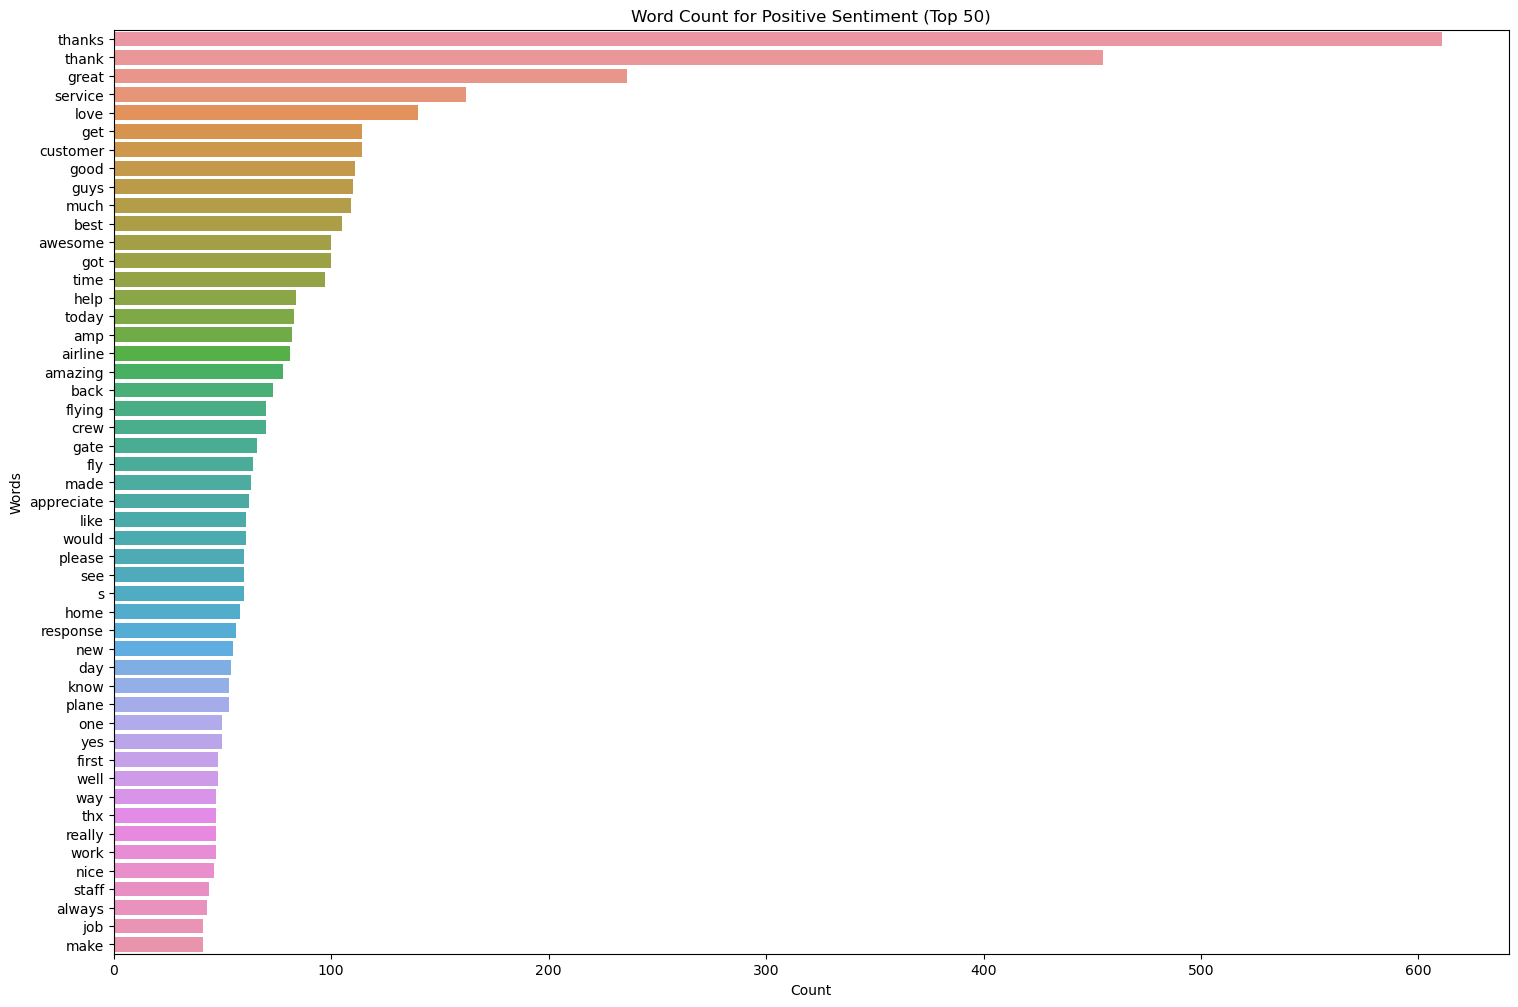

In [57]:
# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'positive']

# Split the words in the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
flattened_word_list = [word for sublist in word_list for word in sublist]

# Count the words
word_count = pd.Series(flattened_word_list).value_counts().reset_index()
word_count.columns = ['Words', 'Count']

# Plot the word count using seaborn countplot
plt.figure(figsize=(18, 12))

# Adjust spacing
plt.tight_layout()

# Plot
sns.barplot(data=word_count.head(50), x='Count', y='Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Word Count for Positive Sentiment (Top 50)')
plt.show()

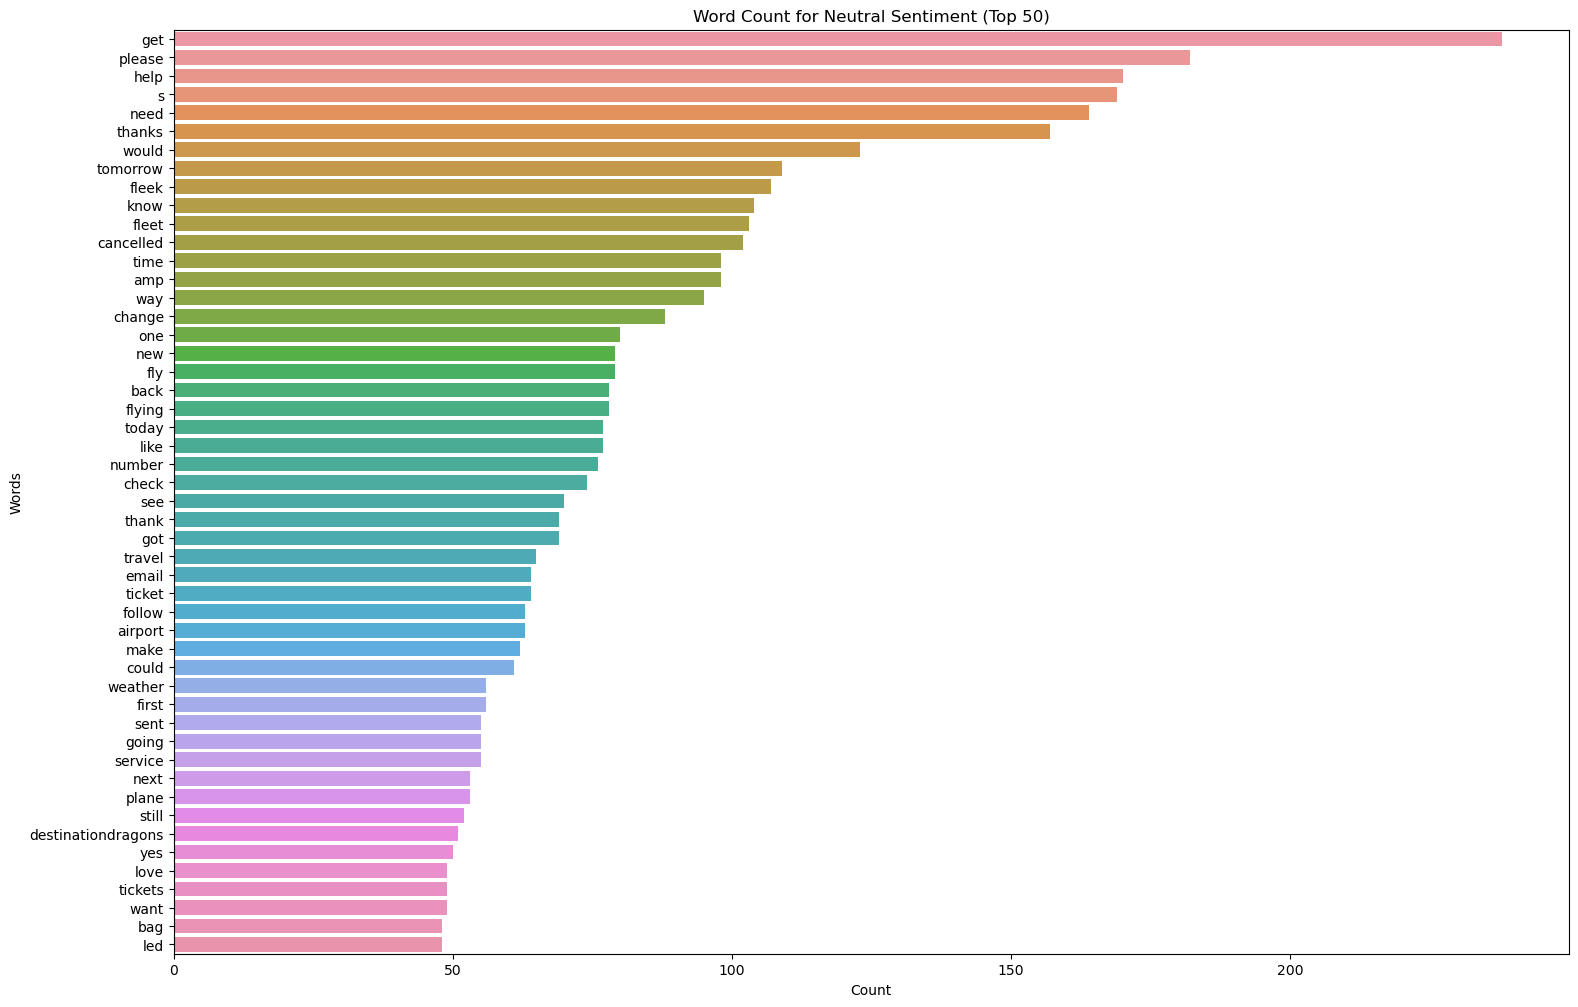

In [58]:
# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'neutral']

# Split the words in the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
flattened_word_list = [word for sublist in word_list for word in sublist]

# Count the words
word_count = pd.Series(flattened_word_list).value_counts().reset_index()
word_count.columns = ['Words', 'Count']

# Plot the word count using seaborn countplot
plt.figure(figsize=(18, 12))

# Adjust spacing
plt.tight_layout()

# Plot
sns.barplot(data=word_count.head(50), x='Count', y='Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Word Count for Neutral Sentiment (Top 50)')
plt.show()

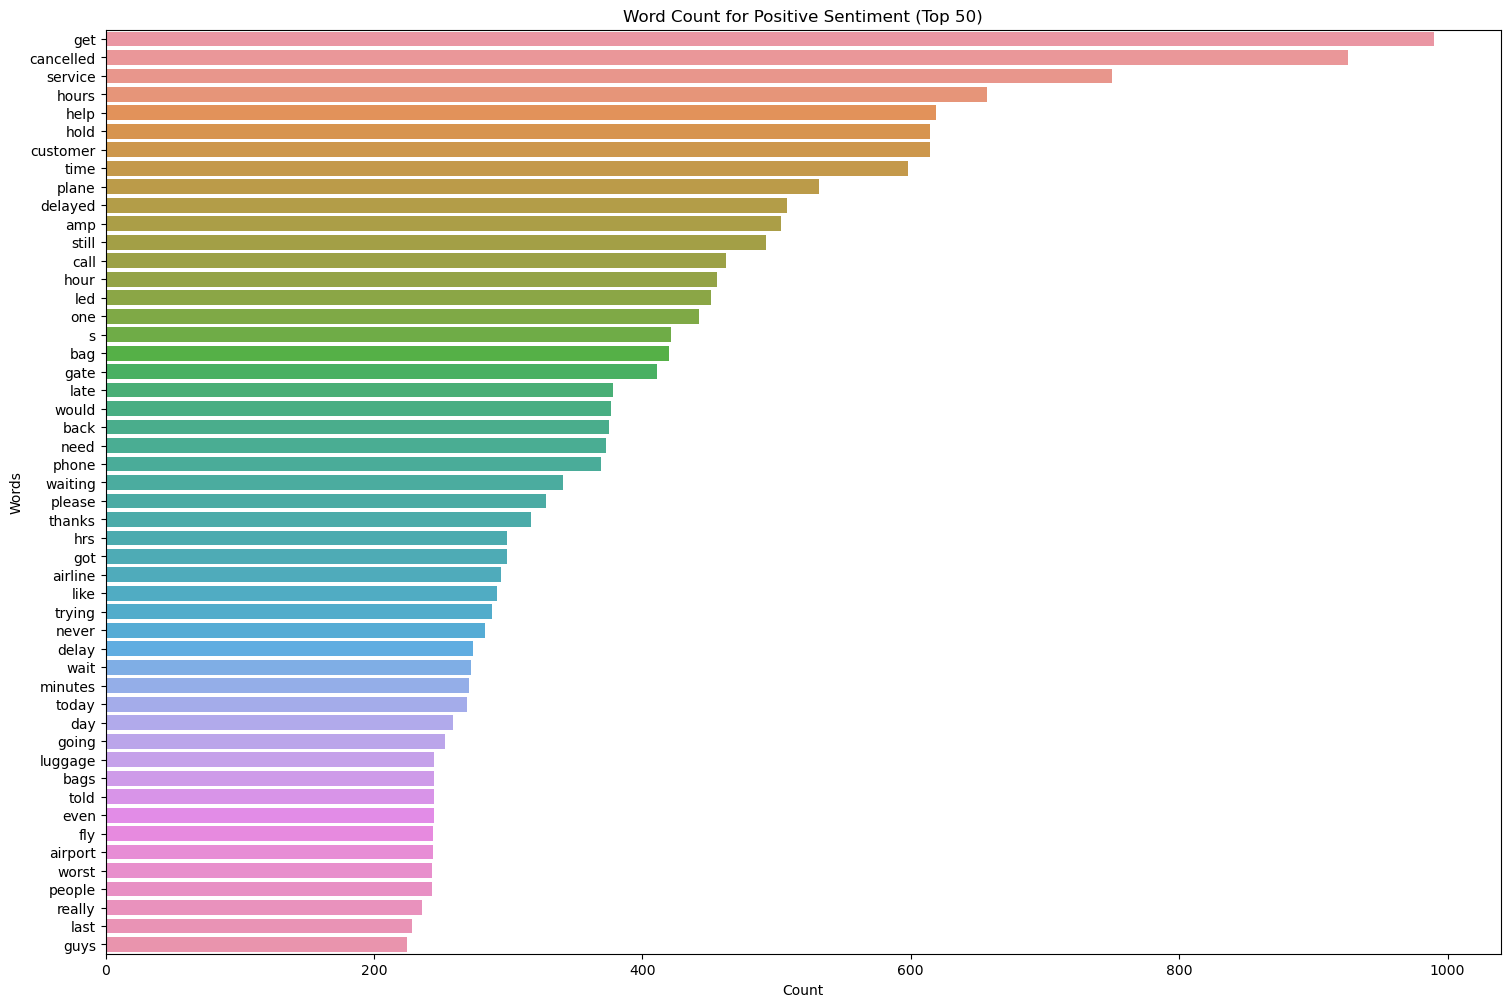

In [59]:
# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'negative']

# Split the words in the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
flattened_word_list = [word for sublist in word_list for word in sublist]

# Count the words
word_count = pd.Series(flattened_word_list).value_counts().reset_index()
word_count.columns = ['Words', 'Count']

# Plot the word count using seaborn countplot
plt.figure(figsize=(18, 12))

# Adjust spacing
plt.tight_layout()

# Plot
sns.barplot(data=word_count.head(50), x='Count', y='Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Word Count for Positive Sentiment (Top 50)')
plt.show()

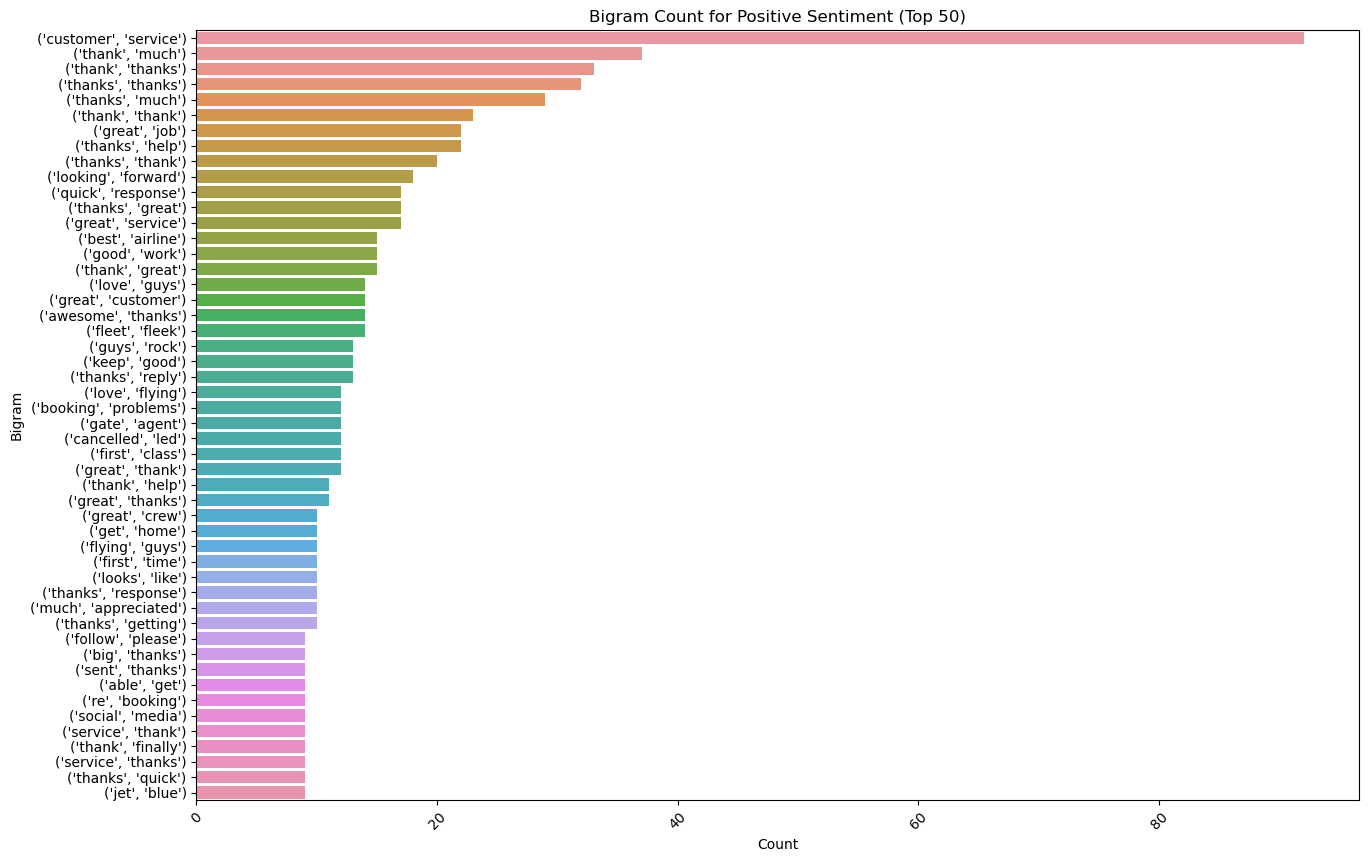

                 Bigram  Count
0   (customer, service)     92
1         (thank, much)     37
2       (thank, thanks)     33
3      (thanks, thanks)     32
4        (thanks, much)     29
5        (thank, thank)     23
6          (great, job)     22
7        (thanks, help)     22
8       (thanks, thank)     20
9    (looking, forward)     18
10    (quick, response)     17
11      (thanks, great)     17
12     (great, service)     17
13      (best, airline)     15
14         (good, work)     15
15       (thank, great)     15
16         (love, guys)     14
17    (great, customer)     14
18    (awesome, thanks)     14
19       (fleet, fleek)     14
20         (guys, rock)     13
21         (keep, good)     13
22      (thanks, reply)     13
23       (love, flying)     12
24  (booking, problems)     12
25        (gate, agent)     12
26     (cancelled, led)     12
27       (first, class)     12
28       (great, thank)     12
29        (thank, help)     11
30      (great, thanks)     11
31      

In [60]:
#Bigram for Positive Sentiment

# Filter the DataFrame based on the "Positive sentiment" column
filtered_data = df[df['airline_sentiment'] == 'positive']

# Create a list of bigrams from the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
bigram_list = list(bigrams([word for sublist in word_list for word in sublist]))

# Count the bigrams
bigram_count = Counter(bigram_list).most_common(50)
bigram_count_df = pd.DataFrame(bigram_count, columns=['Bigram', 'Count'])

# Plot the bigram count using seaborn countplot
plt.figure(figsize=(15, 10))
sns.barplot(data=bigram_count_df, x='Count', y='Bigram')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Bigram Count for Positive Sentiment (Top 50)')
plt.xticks(rotation=45)
plt.show()

# Display bigrams most associated with sentiment 2, positive
print(bigram_count_df)

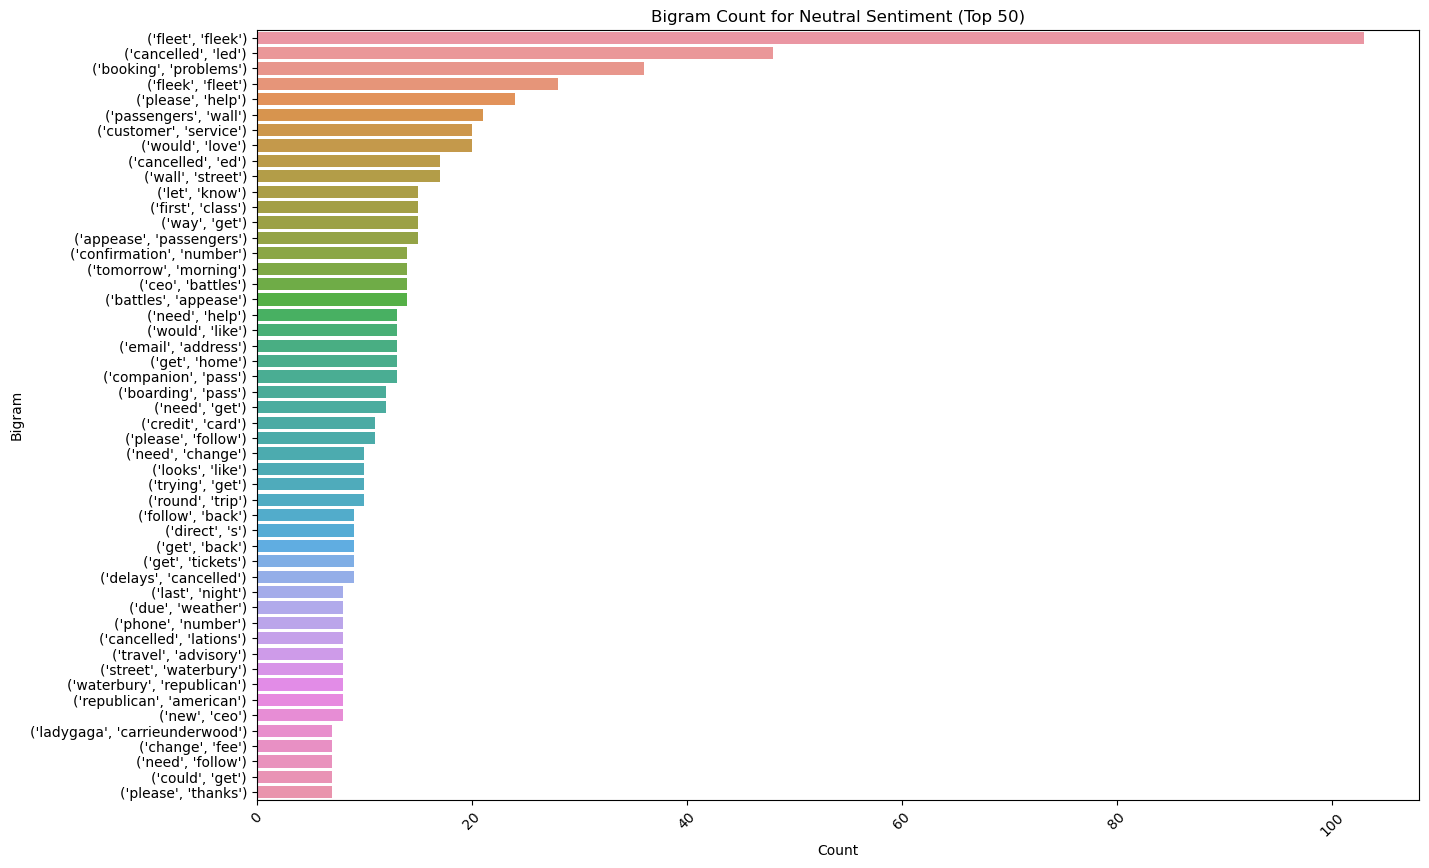

                         Bigram  Count
0                (fleet, fleek)    103
1              (cancelled, led)     48
2           (booking, problems)     36
3                (fleek, fleet)     28
4                (please, help)     24
5            (passengers, wall)     21
6           (customer, service)     20
7                 (would, love)     20
8               (cancelled, ed)     17
9                (wall, street)     17
10                  (let, know)     15
11               (first, class)     15
12                   (way, get)     15
13        (appease, passengers)     15
14       (confirmation, number)     14
15          (tomorrow, morning)     14
16               (ceo, battles)     14
17           (battles, appease)     14
18                 (need, help)     13
19                (would, like)     13
20             (email, address)     13
21                  (get, home)     13
22            (companion, pass)     13
23             (boarding, pass)     12
24                  (need

In [61]:
#Bigram for Neutral sentiment

# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'neutral']

# Create a list of bigrams from the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
bigram_list = list(bigrams([word for sublist in word_list for word in sublist]))

# Count the bigrams
bigram_count = Counter(bigram_list).most_common(50)
bigram_count_df = pd.DataFrame(bigram_count, columns=['Bigram', 'Count'])

# Plot the bigram count using seaborn countplot
plt.figure(figsize=(15, 10))
sns.barplot(data=bigram_count_df, x='Count', y='Bigram')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Bigram Count for Neutral Sentiment (Top 50)')
plt.xticks(rotation=45)
plt.show()

# Display bigrams most associated with sentiment neutral
print(bigram_count_df)

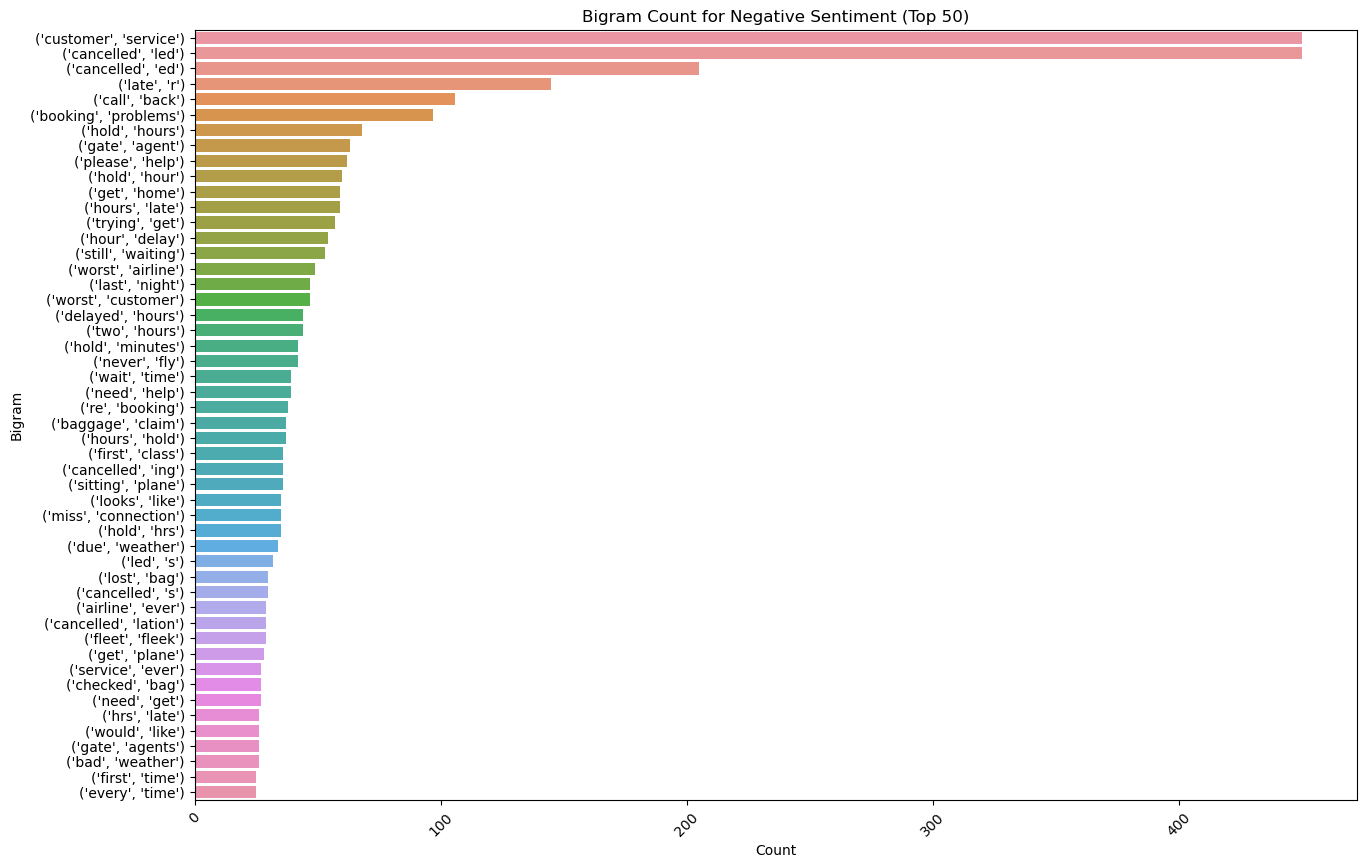

                 Bigram  Count
0   (customer, service)    450
1      (cancelled, led)    450
2       (cancelled, ed)    205
3             (late, r)    145
4          (call, back)    106
5   (booking, problems)     97
6         (hold, hours)     68
7         (gate, agent)     63
8        (please, help)     62
9          (hold, hour)     60
10          (get, home)     59
11        (hours, late)     59
12        (trying, get)     57
13        (hour, delay)     54
14     (still, waiting)     53
15     (worst, airline)     49
16        (last, night)     47
17    (worst, customer)     47
18     (delayed, hours)     44
19         (two, hours)     44
20      (hold, minutes)     42
21         (never, fly)     42
22         (wait, time)     39
23         (need, help)     39
24        (re, booking)     38
25     (baggage, claim)     37
26        (hours, hold)     37
27       (first, class)     36
28     (cancelled, ing)     36
29     (sitting, plane)     36
30        (looks, like)     35
31   (mi

In [62]:
# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'negative']

# Create a list of bigrams from the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
bigram_list = list(bigrams([word for sublist in word_list for word in sublist]))

# Count the bigrams
bigram_count = Counter(bigram_list).most_common(50)
bigram_count_df = pd.DataFrame(bigram_count, columns=['Bigram', 'Count'])

# Plot the bigram count using seaborn countplot
plt.figure(figsize=(15, 10))
sns.barplot(data=bigram_count_df, x='Count', y='Bigram')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Bigram Count for Negative Sentiment (Top 50)')
plt.xticks(rotation=45)
plt.show()

# Display bigrams most associated with sentiment neutral
print(bigram_count_df)

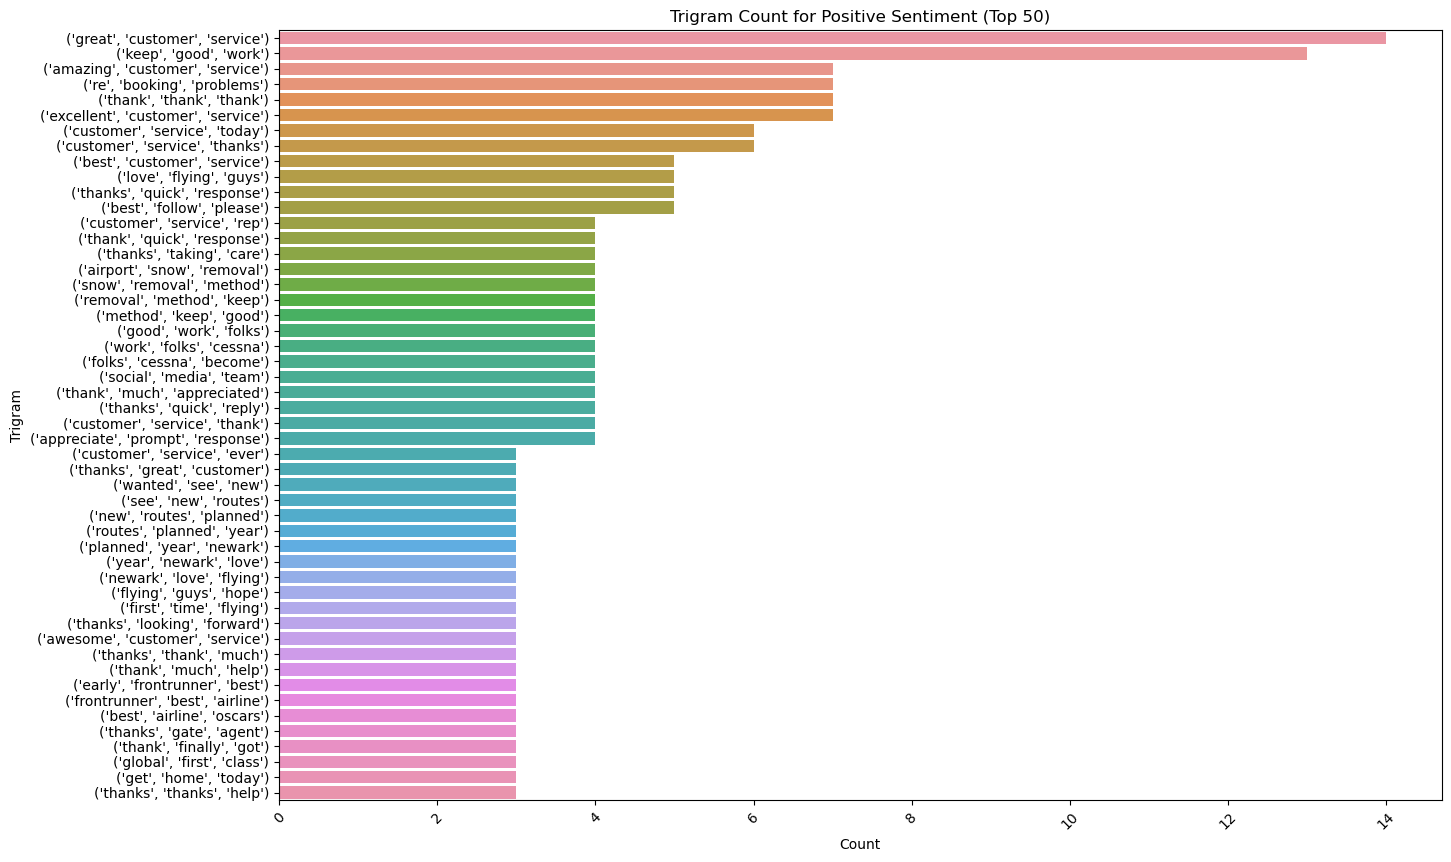

                           Trigram  Count
0       (great, customer, service)     14
1               (keep, good, work)     13
2     (amazing, customer, service)      7
3          (re, booking, problems)      7
4            (thank, thank, thank)      7
5   (excellent, customer, service)      7
6       (customer, service, today)      6
7      (customer, service, thanks)      6
8        (best, customer, service)      5
9             (love, flying, guys)      5
10       (thanks, quick, response)      5
11          (best, follow, please)      5
12        (customer, service, rep)      4
13        (thank, quick, response)      4
14          (thanks, taking, care)      4
15        (airport, snow, removal)      4
16         (snow, removal, method)      4
17         (removal, method, keep)      4
18            (method, keep, good)      4
19             (good, work, folks)      4
20           (work, folks, cessna)      4
21         (folks, cessna, become)      4
22           (social, media, team)

In [63]:
#Trigram for positive sentiment

# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'positive']

# Create a list of trigrams from the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
trigram_list = list(ngrams([word for sublist in word_list for word in sublist], 3))

# Count the trigrams
trigram_count = Counter(trigram_list).most_common(50)
trigram_count_df = pd.DataFrame(trigram_count, columns=['Trigram', 'Count'])

# Plot the trigram count using seaborn countplot
plt.figure(figsize=(15, 10))
sns.barplot(data=trigram_count_df, x='Count', y='Trigram')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.title('Trigram Count for Positive Sentiment (Top 50)')
plt.xticks(rotation=45)
plt.show()

# Display bigrams most associated with sentiment positive
print(trigram_count_df)

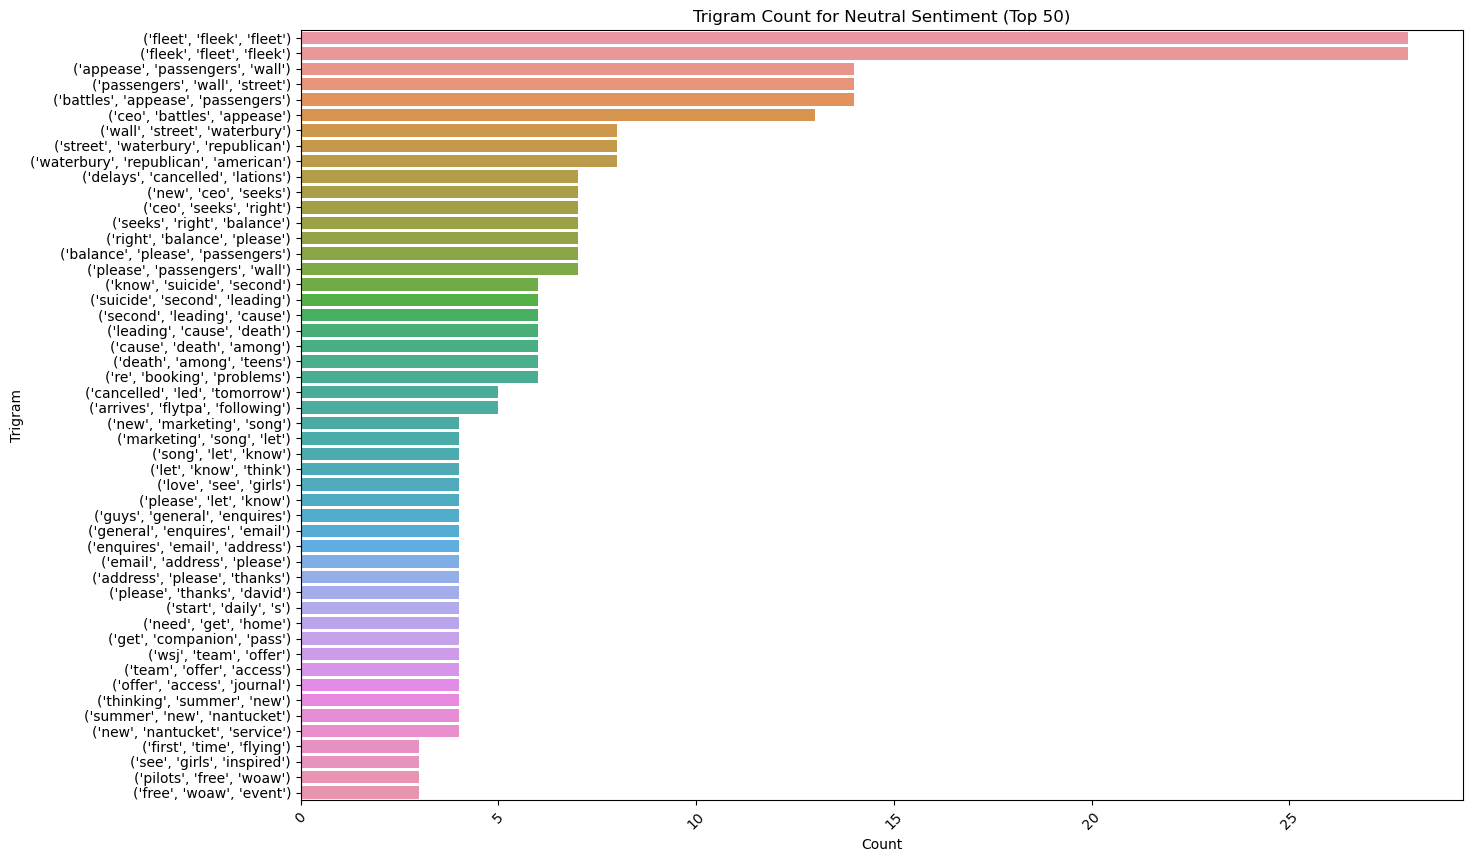

                              Trigram  Count
0               (fleet, fleek, fleet)     28
1               (fleek, fleet, fleek)     28
2         (appease, passengers, wall)     14
3          (passengers, wall, street)     14
4      (battles, appease, passengers)     14
5             (ceo, battles, appease)     13
6           (wall, street, waterbury)      8
7     (street, waterbury, republican)      8
8   (waterbury, republican, american)      8
9        (delays, cancelled, lations)      7
10                  (new, ceo, seeks)      7
11                (ceo, seeks, right)      7
12            (seeks, right, balance)      7
13           (right, balance, please)      7
14      (balance, please, passengers)      7
15         (please, passengers, wall)      7
16            (know, suicide, second)      6
17         (suicide, second, leading)      6
18           (second, leading, cause)      6
19            (leading, cause, death)      6
20              (cause, death, among)      6
21        

In [64]:
#Trigram for Neutral Sentiment

# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'neutral']

# Create a list of trigrams from the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
trigram_list = list(ngrams([word for sublist in word_list for word in sublist], 3))

# Count the trigrams
trigram_count = Counter(trigram_list).most_common(50)
trigram_count_df = pd.DataFrame(trigram_count, columns=['Trigram', 'Count'])

# Plot the trigram count using seaborn countplot
plt.figure(figsize=(15, 10))
sns.barplot(data=trigram_count_df, x='Count', y='Trigram')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.title('Trigram Count for Neutral Sentiment (Top 50)')
plt.xticks(rotation=45)
plt.show()

# Display bigrams most associated with sentiment neutral
print(trigram_count_df)

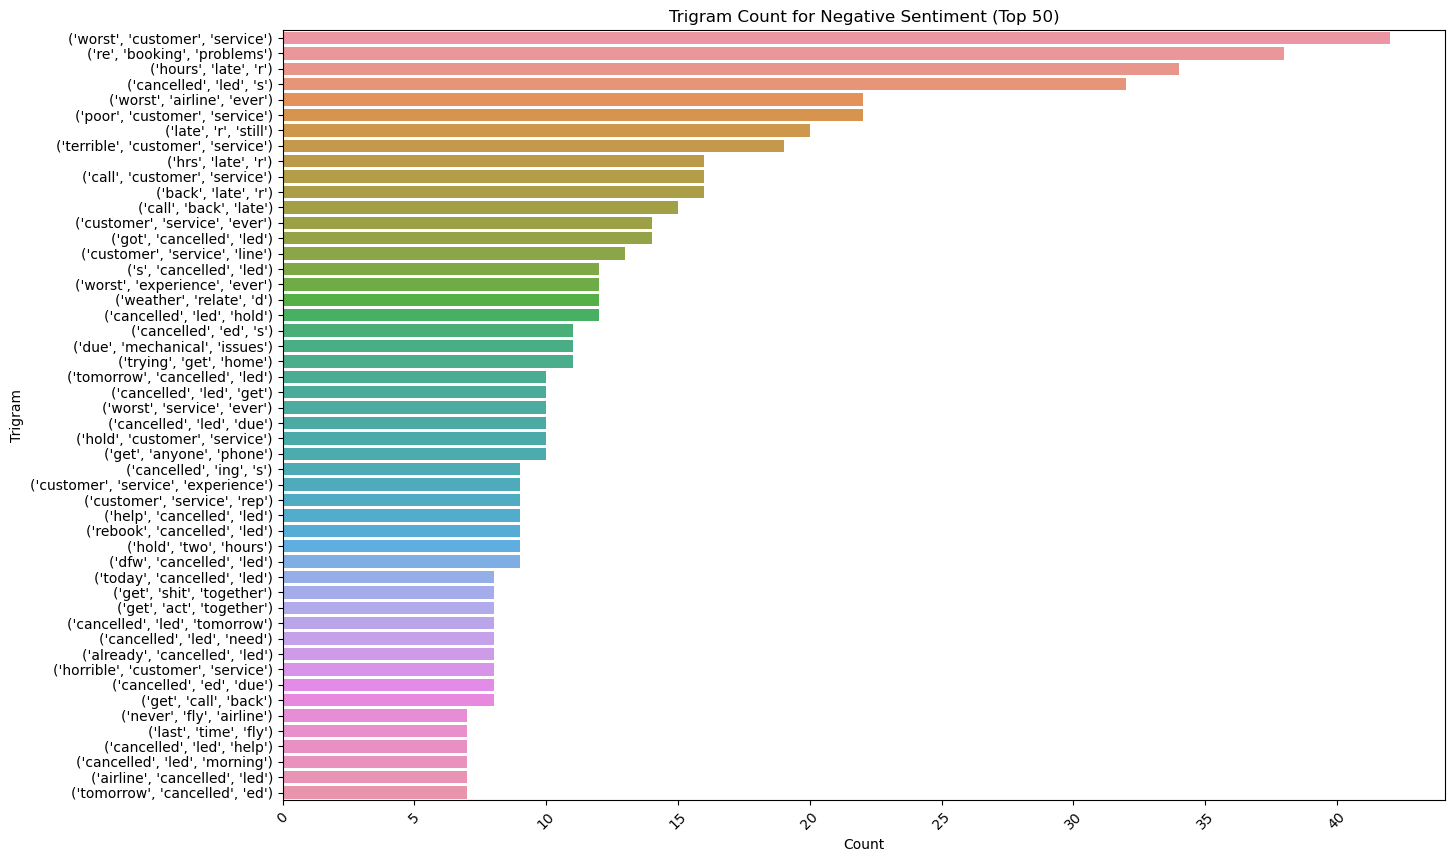

                            Trigram  Count
0        (worst, customer, service)     42
1           (re, booking, problems)     38
2                  (hours, late, r)     34
3               (cancelled, led, s)     32
4            (worst, airline, ever)     22
5         (poor, customer, service)     22
6                  (late, r, still)     20
7     (terrible, customer, service)     19
8                    (hrs, late, r)     16
9         (call, customer, service)     16
10                  (back, late, r)     16
11               (call, back, late)     15
12        (customer, service, ever)     14
13            (got, cancelled, led)     14
14        (customer, service, line)     13
15              (s, cancelled, led)     12
16        (worst, experience, ever)     12
17             (weather, relate, d)     12
18           (cancelled, led, hold)     12
19               (cancelled, ed, s)     11
20        (due, mechanical, issues)     11
21              (trying, get, home)     11
22       (t

In [65]:
#Trigram Negative sentiment
# Filter the DataFrame based on the "sentiment" column
filtered_data = df[df['airline_sentiment'] == 'negative']

# Create a list of trigrams from the "clean" column
word_list = filtered_data['textclean'].str.split().tolist()
trigram_list = list(ngrams([word for sublist in word_list for word in sublist], 3))

# Count the trigrams
trigram_count = Counter(trigram_list).most_common(50)
trigram_count_df = pd.DataFrame(trigram_count, columns=['Trigram', 'Count'])

# Plot the trigram count using seaborn countplot
plt.figure(figsize=(15, 10))
sns.barplot(data=trigram_count_df, x='Count', y='Trigram')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.title('Trigram Count for Negative Sentiment (Top 50)')
plt.xticks(rotation=45)
plt.show()

# Display bigrams most associated with sentiment negative
print(trigram_count_df)

In [66]:
# Load data
tsamp = df
tsamp.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

         date                       time  year  month  day time_category  \
0  2015-02-24  2023-07-19 11:35:52-08:00  2015      2   24       Morning   
1  2015-02-24  2023-07-19 11:15:59-08:00  2015      2   24       Morning   
2  2015-02-24  2023-07-19 11:15:48-08:00  2015      2   24       Morning   
3  2015-02-24  2023-07-19 11:15:36-08:00  2015      2   24       Morning   
4  2015-02-24  2023-07-19 11:14:45-08:00  2015      2   24       Morning   

                                               clean  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercials experienc...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   

                                           textclean  tweet_len  polarity  \
0                                      dhepburn said         14   0.00000   
1            plus added commercials experience tacky         40   0.00000   
2             today must mean need take another trip         39  -0.31250   
3   really aggressive blast obnoxious entertainme...         81   0.00625   
4                               really big bad thing         21  -0.35000   

   word_count  
0           2  
1           5  
2           7  
3          10  
4           4

In [67]:
#Filter out columns
tsamp = tsamp.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'airline', 'name', 'retweet_count', 'tweet_created', 'tweet_location', 'user_timezone', 'year', 'month', 'day'], axis=1)

In [68]:
# Validation 
tsamp.head()

airline_sentiment  negativereason_confidence  \
0           neutral                        NaN   
1          positive                     0.0000   
2           neutral                        NaN   
3          negative                     0.7033   
4          negative                     1.0000   

                                                text        date  \
0                @VirginAmerica What @dhepburn said.  2015-02-24   
1  @VirginAmerica plus you've added commercials t...  2015-02-24   
2  @VirginAmerica I didn't today... Must mean I n...  2015-02-24   
3  @VirginAmerica it's really aggressive to blast...  2015-02-24   
4  @VirginAmerica and it's a really big bad thing...  2015-02-24   

                        time time_category  \
0  2023-07-19 11:35:52-08:00       Morning   
1  2023-07-19 11:15:59-08:00       Morning   
2  2023-07-19 11:15:48-08:00       Morning   
3  2023-07-19 11:15:36-08:00       Morning   
4  2023-07-19 11:14:45-08:00       Morning   

                                               clean  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercials experienc...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   

                                           textclean  tweet_len  polarity  \
0                                      dhepburn said         14   0.00000   
1            plus added commercials experience tacky         40   0.00000   
2             today must mean need take another trip         39  -0.31250   
3   really aggressive blast obnoxious entertainme...         81   0.00625   
4                               really big bad thing         21  -0.35000   

   word_count  
0           2  
1           5  
2           7  
3          10  
4           4

In [69]:
# Select sample size
spot = tsamp.sample(n=7000,replace=False)

<div style="font-family:Georgia">  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; From the total data, 7,000 rows are being selected for the sample.
    <div>

In [70]:
# Word count
spot['clean_count'] = spot['clean'].map(lambda x:len(re.findall(r'\w+', x))) 
common_spot = spot[spot['clean_count'] > 4]

In [71]:
# Display first 5 rows
common_spot.head()

airline_sentiment  negativereason_confidence  \
13712          negative                     1.0000   
116            positive                        NaN   
2781           negative                     0.6582   
5171           negative                     1.0000   
14594          negative                     0.7094   

                                                    text        date  \
13712  @AmericanAir Flight 4606 from MEM to DCA delay...  2015-02-22   
116    @VirginAmerica is the best airline I have flow...  2015-02-23   
2781   @united also doesn't help me. I'm a very frequ...  2015-02-20   
5171   @SouthwestAir I'm here @ChicagoMidway airport....  2015-02-21   
14594  @AmericanAir Hey AA - can you help with an iti...  2015-02-22   

                            time time_category  \
13712  2023-07-19 22:02:51-08:00       Evening   
116    2023-07-19 03:01:39-08:00         Night   
2781   2023-07-19 14:37:57-08:00     Afternoon   
5171   2023-07-19 15:49:41-08:00     Afternoon   
14594  2023-07-19 12:25:21-08:00     Afternoon   

                                                   clean  \
13712  americanair flight mem dca delayed hours holdi...   
116    virginamerica best airline flown easy change r...   
2781   united also help frequent flier united premier...   
5171   southwestair chicagomidway airport waited hour...   
14594  americanair hey help itinerary plat custy stuc...   

                                               textclean  tweet_len  polarity  \
13712    mem dca delayed hours holding breath keep tr...         70 -0.200000   
116     best airline flown easy change reservation he...        101  0.611111   
2781    also help frequent flier  premiere gold appar...         65  0.075000   
5171    chicagomidway airport waited hours bag one kn...         86 -0.412500   
14594   hey help itinerary plat custy stuck pvr phone...         55  0.000000   

       word_count  clean_count  
13712          11           13  
116            12           13  
2781            9           11  
5171           13           14  
14594           9           10

In [72]:
# Model train assignment
x_train = common_spot['clean']
y_train = common_spot['airline_sentiment']

In [73]:
# Display first 5 rows
x_train.head()

13712    americanair flight mem dca delayed hours holdi...
116      virginamerica best airline flown easy change r...
2781     united also help frequent flier united premier...
5171     southwestair chicagomidway airport waited hour...
14594    americanair hey help itinerary plat custy stuc...
Name: clean, dtype: object

In [74]:
# Display first 5 rows
y_train.head()

13712    negative
116      positive
2781     negative
5171     negative
14594    negative
Name: airline_sentiment, dtype: object

In [75]:
# Display unique sentiments: negative, neutral, and positve
y_train.unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [76]:
# Create 90% training test, 10% validation test
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

In [77]:
# Tokenize "text"

tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train.values) + list(x_valid.values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_valid)

In [78]:
# Logistic regression
spot_vectorized = vectorizer.transform(spot['clean'])
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(train_vectorized, y_train)
lr_score = logreg.score(test_vectorized, y_valid)
print(lr_score)

0.744299674267101


In [79]:
# Linear SVC (support vector classification)
linsvc = LinearSVC(max_iter=2000)
linsvc.fit(train_vectorized, y_train)
linsvc_score = linsvc.score(test_vectorized, y_valid)
print(linsvc_score)

0.762214983713355


In [80]:
# Multinomial Naive Bayes classifier
multinb = MultinomialNB()
multinb.fit(train_vectorized, y_train)
multinb_score = multinb.score(test_vectorized, y_valid)
print(multinb_score)

0.6824104234527687


In [81]:
# Bernoulli Naive Bayes classifier
bernb = BernoulliNB()
bernb.fit(train_vectorized, y_train)
bernb_score = bernb.score(test_vectorized, y_valid)
print(bernb_score)

0.6807817589576547


In [82]:
# Perform predictions using the best model
best_model = linsvc  # Replace with the best model based on accuracy score
predictions = best_model.predict(test_vectorized)

In [83]:
#building confusion matrix
cm = confusion_matrix(y_valid, predictions)
cm

array([[409,   7,   1],
       [ 77,  25,   7],
       [ 47,   7,  34]], dtype=int64)

In [84]:
#Length of confusion matrix
len(y_valid)

614

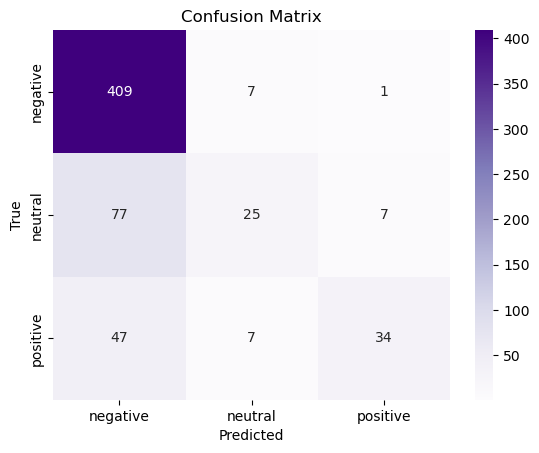

In [85]:
# Plot the confusion matrix as a heatmap
labels = np.unique(y_valid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [86]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

    negative       0.77      0.98      0.86       417
     neutral       0.64      0.23      0.34       109
    positive       0.81      0.39      0.52        88

    accuracy                           0.76       614
   macro avg       0.74      0.53      0.57       614
weighted avg       0.75      0.76      0.72       614

